In [2]:
import os
import pandas as pd
# import matplotlib.pyplot as plt
import csv
import numpy as np
import plotly.express as px
import plotly.graph_objects as go #this will be to create the subplot tabling

#figure out how to read direct from DB instead of CSV
#subtables = min, max, average, list of outliers from min/max spec, %in spec, #compliant = yes or no
#figure out how to loop through and create height/ weight tables at once  
#figure out how to loop through and create all tables at once
#do we want to convert the pull as pulling only a query of the single product instead of a query of the whole table 


In [ ]:
#WEIGHT-- SUBPLOT TABLE
#TEST product: "8 oz T Tenderloin A"
#SPECIFY product_name = "8 oz T Tenderloin A"
product_name = "8 oz T Tenderloin A"

# Specify the file path
file_path = '../data/cleaned/generic_butcher_cleaned.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

file_path2 = '../data/cleaned/generic_butcher_spec_cleaned.csv'

# Read the CSV file into a DataFrame
df2 = pd.read_csv(file_path2)

# Copy data to preserve original dataset
product_data = df.loc[df["product_name"] == product_name]
product = product_data.copy()

# Adjust decimal point that were obvious errors
product['measured_weight'] = product['measured_weight'].apply(lambda x: x * 0.01 if x > 50 else x)

#Find relevant subplot data
weight_min_spec = df2.loc[df2['product_name'] == product_name, 'weight_min'].iloc[0]
weight_max_spec = df2.loc[df2['product_name'] == product_name, 'weight_max'].iloc[0]
weight_avg = np.mean(product['measured_weight'])
count_wt = np.count((product['measured_weight'])
min_wt = np.min(product['measured_weight'])
max_wt = np.max(product['measured_weight'])
in_spec_wt = product['measured_weight'].apply(lambda x: weight_min_spec <= x <= weight_max_spec)
percent_in_spec = np.



#Create dataframe called subplot_weight that includes 
#min
#max 
#average
#%inspec
#values out of spec
#boolean of compliant or not 




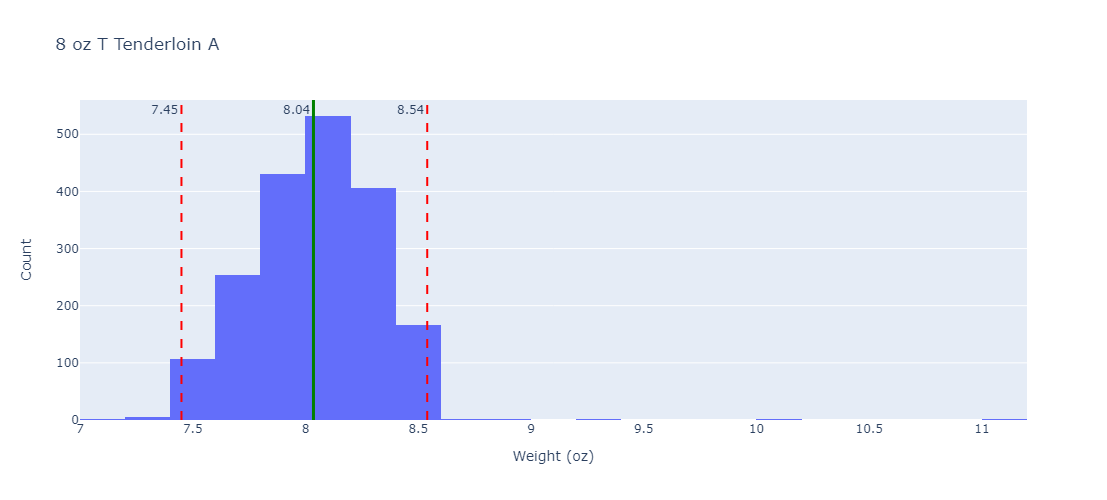

In [23]:
#WEIGHT
#TEST product: "8 oz T Tenderloin A"
#SPECIFY product_name = "8 oz T Tenderloin A"
product_name = "8 oz T Tenderloin A"

# Specify the file path
file_path = '../data/cleaned/generic_butcher_cleaned.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

file_path2 = '../data/cleaned/generic_butcher_spec_cleaned.csv'

# Read the CSV file into a DataFrame
df2 = pd.read_csv(file_path2)

# Copy data to preserve original dataset
product_data = df.loc[df["product_name"] == product_name]
product = product_data.copy()

# Adjust decimal point that were obvious errors
product['measured_weight'] = product['measured_weight'].apply(lambda x: x * 0.01 if x > 50 else x)

# Determine bin min and max in a readable format
min_wt = np.min(product['measured_weight'])
max_wt = np.max(product['measured_weight'])
binmin_wt = np.floor(min_wt)
binmax_wt = np.ceil(max_wt)

# Determine spec goal posts
weight_min_spec = df2.loc[df2['product_name'] == product_name, 'weight_min'].iloc[0]
weight_max_spec = df2.loc[df2['product_name'] == product_name, 'weight_max'].iloc[0]
weight_avg = np.mean(product['measured_weight'])

# Created bins based on the quarter ounce
num_bins_wt = int((binmax_wt - binmin_wt) * 1/.25)

# Pulls measured weight data for the x value of the histogram
product_weights = product['measured_weight']

# Create the histogram using Plotly Express
fig = px.histogram(product, x='measured_weight', nbins=num_bins_wt, title=product_name)

# Add vertical lines for average, min spec, and max spec using add_vline
fig.add_vline(x=weight_avg, line=dict(color="green", width=3), annotation_text=f"{weight_avg:.2f}", annotation_position="top left")
fig.add_vline(x=weight_min_spec, line=dict(color="red", width=2, dash='dash'), annotation_text= f"{weight_min_spec:.2f}", annotation_position="top left")
fig.add_vline(x=weight_max_spec, line=dict(color="red", width=2, dash='dash'), annotation_text=f"{weight_max_spec:.2f}", annotation_position="top left")

# Update xaxis and yaxis labels
fig.update_layout(
    width=1000,
    height=500,
    xaxis_title='Weight (oz)',
    yaxis_title='Count',
    showlegend=False
)

# Show the plot
fig.show()


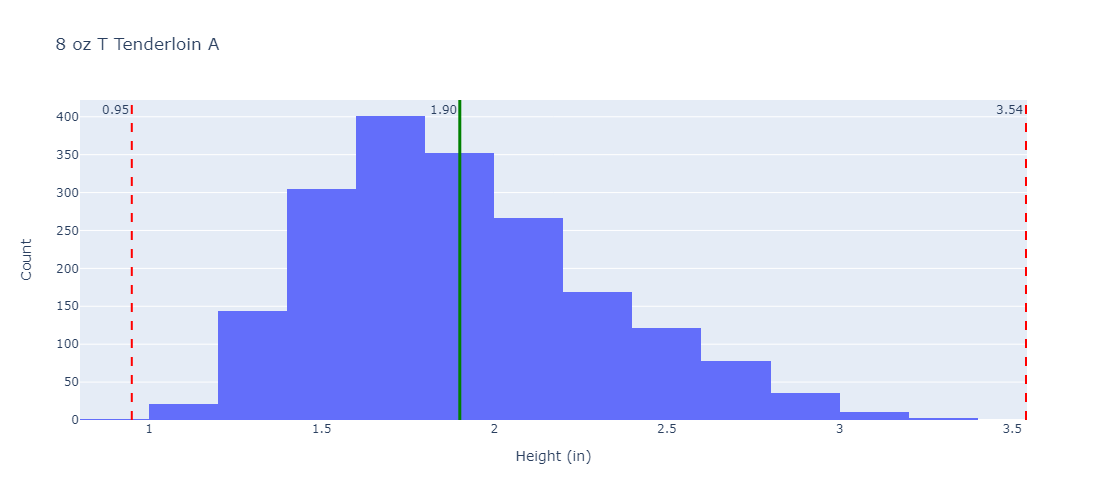

In [24]:
#THICKNESS (NOTE-- min thick needs to be removed at cleaning stage)
#TEST product: "8 oz T Tenderloin A"
# Specify the product name
product_name = "8 oz T Tenderloin A"

# Specify the file path
file_path = '../data/cleaned/generic_butcher_cleaned.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

file_path2 = '../data/cleaned/generic_butcher_spec_cleaned.csv'

# Read the CSV file into a DataFrame
df2 = pd.read_csv(file_path2)

# Copy data to preserve original dataset
product_data = df.loc[df["product_name"] == product_name]
product = product_data.copy()

# Determine bin min and max in a readable format
min_ht = np.min(product['measured_height'])
max_ht = np.max(product['measured_height'])
binmin_ht = np.floor(min_ht)
binmax_ht = np.ceil(max_ht)

# Determine spec goal posts
height_min_spec = df2.loc[df2['product_name'] == product_name, 'height_min'].iloc[0]
height_max_spec = df2.loc[df2['product_name'] == product_name, 'height_max'].iloc[0]

# Calculate average height
height_avg = np.mean(product['measured_height'])

# Created bins based on the 0.1 inch increments
num_bins_ht = int((binmax_ht - binmin_ht) * 1/.1)

# Pulls measured height data for the x value of the histogram
product_heights = product['measured_height']

# Create the histogram using Plotly Express
fig = px.histogram(product, x='measured_height', nbins=num_bins, title=product_name)

# Add vertical lines for average, min spec, and max spec using add_vline
fig.add_vline(x=height_avg, line=dict(color="green", width=3), annotation_text=f"{height_avg:.2f}", annotation_position="top left")
fig.add_vline(x=height_min_spec, line=dict(color="red", width=2, dash='dash'), annotation_text=f"{height_min_spec:.2f}", annotation_position="top left")
fig.add_vline(x=height_max_spec, line=dict(color="red", width=2, dash='dash'), annotation_text=f"{height_max_spec:.2f}", annotation_position="top left")

# Update xaxis and yaxis labels
fig.update_layout(
    width=1000,
    height=500,
    xaxis_title='Height (in)',
    yaxis_title='Count',
    showlegend=False
)

# Show the plot
fig.show()